In [1]:
import gdown
url = "https://drive.google.com/file/d/1n8r_n529WN4jit8W_zpXbHSUmTrcSK93/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "catdog.zip")

1n8r_n529WN4jit8W_zpXbHSUmTrcSK93


Downloading...
From: https://drive.google.com/uc?/export=download&id=1n8r_n529WN4jit8W_zpXbHSUmTrcSK93
To: /content/catdog.zip
100%|██████████| 228M/228M [00:05<00:00, 45.4MB/s]


'catdog.zip'

In [2]:
!unzip catdog.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dogs_And_Cats/training_set/cats/cat.3705.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3706.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3707.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3708.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3709.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.371.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3710.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3711.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3712.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3713.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3714.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3715.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3716.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3717.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3718.jpg  
  inflating: Dogs_And_Cats/training_set/cats/cat.3

In [3]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [4]:
# Set the path to your training and validation data
train_data_dir = '/content/Dogs_And_Cats/training_set'
validation_data_dir = '/content/Dogs_And_Cats/test_set'

# Set the number of training and validation samples
num_train_samples = 2000
num_validation_samples = 800

# Set the number of epochs and batch size
epochs = 5
batch_size = 16

# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# Create a new model
model = Sequential()

# Add the base model as a layer
model.add(base_model)

# Add custom layers on top of the base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [9]:
model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_validation_samples // batch_size)

Epoch 1/5
125/125 [==============================] - 23s 92ms/step - loss: 2.8351 - accuracy: 0.9355 - val_loss: 0.8861 - val_accuracy: 0.9750
Epoch 2/5
125/125 [==============================] - 14s 109ms/step - loss: 0.5851 - accuracy: 0.9588 - val_loss: 0.3909 - val_accuracy: 0.9725
Epoch 3/5
125/125 [==============================] - 11s 90ms/step - loss: 0.4282 - accuracy: 0.9665 - val_loss: 0.3550 - val_accuracy: 0.9625
Epoch 4/5
125/125 [==============================] - 13s 107ms/step - loss: 0.1888 - accuracy: 0.9759 - val_loss: 0.1840 - val_accuracy: 0.9737
Epoch 5/5
125/125 [==============================] - 11s 92ms/step - loss: 0.1275 - accuracy: 0.9760 - val_loss: 0.0776 - val_accuracy: 0.9787


In [10]:
import cv2

In [49]:
testing=cv2.imread('/content/billu.jpg')

In [50]:
import matplotlib.pyplot as plt

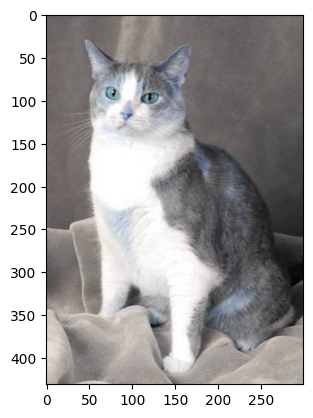

In [51]:
plt.imshow(testing)

In [52]:
testing.shape

(431, 300, 3)

In [53]:
test_img=cv2.resize(testing,(224, 224))

In [54]:
input_img1=test_img.reshape((1,224,224,3))

In [17]:
model.predict(input_img1)

1/1 [==============================] - 1s 849ms/step


array([[0.51470554]], dtype=float32)

In [18]:
testing2=cv2.imread('/content/streetkutta.jpg')

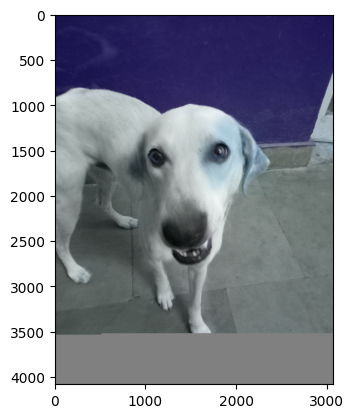

In [19]:
plt.imshow(testing2)

In [20]:
test_img2=cv2.resize(testing2,(224, 224))

In [21]:
input_img2=test_img2.reshape((1,224,224,3))

In [32]:
model.predict(input_img2)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [39]:
testing3=cv2.imread('/content/new.jpg')

In [40]:
test_img3=cv2.resize(testing3,(224,224))

In [41]:
input_img3=test_img3.reshape((1,224,224,3))

In [55]:
result=np.round(model.predict(input_img1))
print(result)


1/1 [==============================] - 0s 18ms/step
[[0.]]


In [56]:
model.save('dog_cat_classifier_latest.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
